In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns' , None)
MobilePricesData= pd.read_csv('mobile.csv')
print("shape before deleting duplicates",MobilePricesData.shape)
MobilePricesData = MobilePricesData.drop_duplicates()
print("shape before deleting duplicates",MobilePricesData.shape)

MobilePricesData.head()

shape before deleting duplicates (3000, 17)
shape before deleting duplicates (3000, 17)


,battery_power,bluetoth,dual_sim,front_cam,4G,int_memory,mob_weight,n_cores,main_cam,px_height,px_width,ram,talk_time,3G,touch_screen,wifi,price_range
0,842,0,0,1,0,7,188,2,2,20,756,2549,19,0,0,1,1.0
1,1021,1,1,0,1,53,136,3,6,905,1988,2631,7,1,1,0,2.0
2,563,1,1,2,1,41,145,5,6,1263,1716,2603,9,1,1,0,2.0
3,615,1,0,0,0,10,131,6,9,1216,1786,2769,11,1,0,0,2.0
4,1821,1,0,13,1,44,141,2,14,1208,1212,1411,15,1,1,0,1.0


# Defining the problem statement: 
#### Create a Predictive model which can tell if a person will survive the titanic crash or not?
* Target Variable: price_range
* Predictors: battery_power,bluetoth,dual_sim,front_cam	4G,int_memory,mob_weight,n_cores,main_cam,px_height,px_width,ram, talk_time	3G,	touch_screen,wifi etc.


* price_range=1.0 chepest phone 
* price_range=2.0 cheap phone 


# Looking for distribution of Target Varible 


<AxesSubplot:xlabel='price_range'>

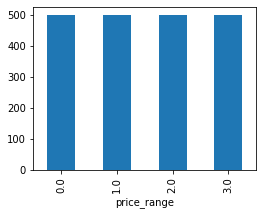

In [3]:
%matplotlib inline

GroupedData = MobilePricesData.groupby('price_range').size()
GroupedData.plot(kind ='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration

In [4]:
# Looking at sample rows in the data
MobilePricesData.head()

,battery_power,bluetoth,dual_sim,front_cam,4G,int_memory,mob_weight,n_cores,main_cam,px_height,px_width,ram,talk_time,3G,touch_screen,wifi,price_range
0,842,0,0,1,0,7,188,2,2,20,756,2549,19,0,0,1,1.0
1,1021,1,1,0,1,53,136,3,6,905,1988,2631,7,1,1,0,2.0
2,563,1,1,2,1,41,145,5,6,1263,1716,2603,9,1,1,0,2.0
3,615,1,0,0,0,10,131,6,9,1216,1786,2769,11,1,0,0,2.0
4,1821,1,0,13,1,44,141,2,14,1208,1212,1411,15,1,1,0,1.0


In [5]:
# Looking at sample rows in the data
MobilePricesData.tail()

,battery_power,bluetoth,dual_sim,front_cam,4G,int_memory,mob_weight,n_cores,main_cam,px_height,px_width,ram,talk_time,3G,touch_screen,wifi,price_range
2995,1700,1,0,0,1,54,170,7,17,644,913,2121,15,1,1,0,NaN
2996,609,0,1,0,0,13,186,4,2,1152,1632,1933,19,0,1,1,NaN
2997,1185,0,0,1,1,8,80,1,12,477,825,1223,14,1,0,0,NaN
2998,1533,1,1,0,0,50,171,2,12,38,832,2509,6,0,1,0,NaN
2999,1270,1,0,4,1,35,140,6,19,457,608,2828,3,1,0,1,NaN


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
MobilePricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   bluetoth       3000 non-null   int64  
 2   dual_sim       3000 non-null   int64  
 3   front_cam      3000 non-null   int64  
 4   4G             3000 non-null   int64  
 5   int_memory     3000 non-null   int64  
 6   mob_weight     3000 non-null   int64  
 7   n_cores        3000 non-null   int64  
 8   main_cam       3000 non-null   int64  
 9   px_height      3000 non-null   int64  
 10  px_width       3000 non-null   int64  
 11  ram            3000 non-null   int64  
 12  talk_time      3000 non-null   int64  
 13  3G             3000 non-null   int64  
 14  touch_screen   3000 non-null   int64  
 15  wifi           3000 non-null   int64  
 16  price_range    2000 non-null   float64
dtypes: float64(1), int64(16)
memory usage: 421.9 KB


In [7]:
# Looking at the descriptive statistics of the data
MobilePricesData.describe(include='all')

,battery_power,bluetoth,dual_sim,front_cam,4G,int_memory,mob_weight,n_cores,main_cam,px_height,px_width,ram,talk_time,3G,touch_screen,wifi,price_range
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000
mean,1241.849000,0.502000,0.512000,4.404000,0.510000,32.581667,140.003000,4.456333,9.962333,639.112333,1247.601667,2129.141333,11.035667,0.759667,0.502000,0.507000,1.500000
std,437.063804,0.500079,0.499939,4.383742,0.499983,18.152810,35.213809,2.289361,6.073923,440.202998,434.666168,1085.694231,5.474400,0.427357,0.500079,0.500034,1.118314
min,500.000000,0.000000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,863.750000,0.000000,0.000000,1.000000,0.000000,16.000000,109.000000,2.000000,5.000000,277.750000,865.000000,1212.750000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1232.000000,1.000000,1.000000,3.000000,1.000000,33.000000,140.000000,4.000000,10.000000,564.000000,1248.000000,2147.500000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1619.000000,1.000000,1.000000,7.000000,1.000000,48.000000,170.000000,6.000000,15.000000,932.500000,1634.000000,3065.250000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1999.000000,1.000000,1.000000,19.000000,1.000000,64.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
MobilePricesData.nunique()

battery_power    1275
bluetoth            2
dual_sim            2
front_cam          20
4G                  2
int_memory         63
mob_weight        121
n_cores             8
main_cam           21
px_height        1333
px_width         1313
ram              2070
talk_time          19
3G                  2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# Visual Exploratory Data Analysis

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

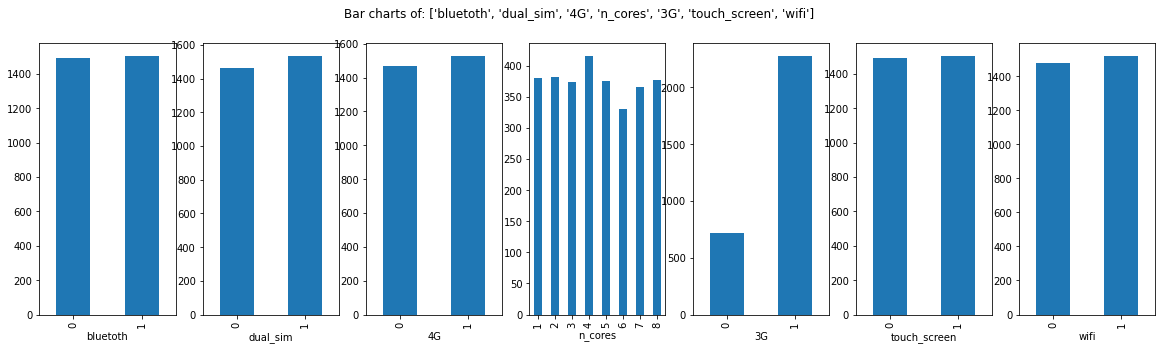

In [10]:
PlotBarCharts(inpData=MobilePricesData, colsToPlot=['bluetoth', 'dual_sim', '4G','n_cores','3G','touch_screen','wifi'])

# For Continous Columns 

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'front_cam'}>,
        <AxesSubplot:title={'center':'int_memory'}>],
       [<AxesSubplot:title={'center':'mob_weight'}>,
        <AxesSubplot:title={'center':'main_cam'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'talk_time'}>]], dtype=object)

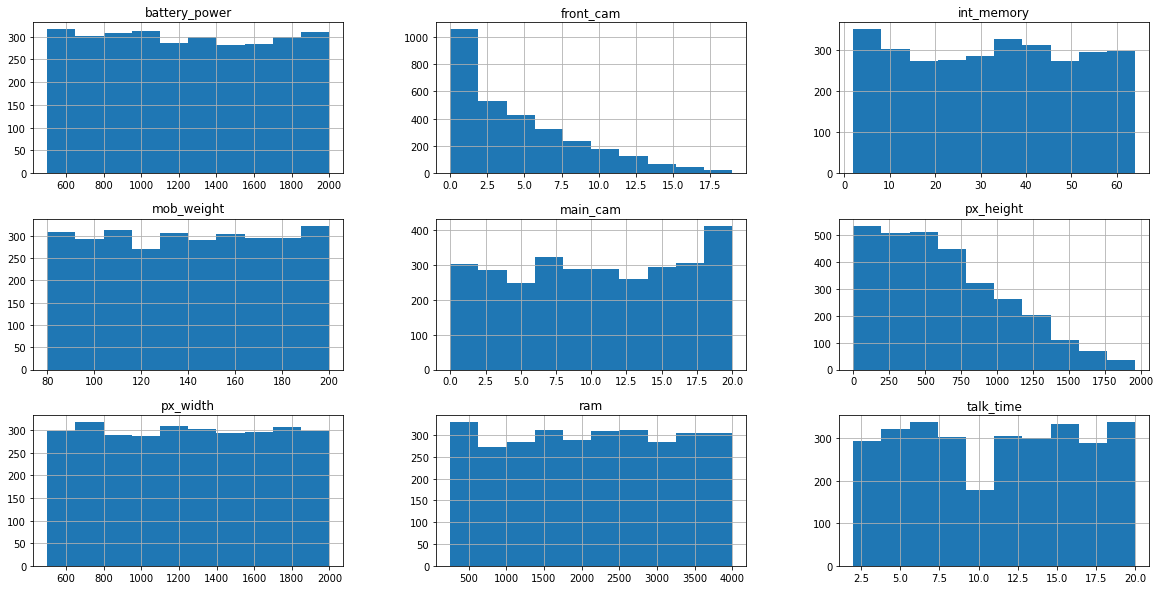

In [11]:
MobilePricesData.hist(['battery_power', 'front_cam','int_memory','mob_weight','main_cam','px_height','px_width','ram','talk_time'],figsize=(20,10))

# Finding how many missing values are there for each column

In [12]:

MobilePricesData.isnull().sum()

battery_power       0
bluetoth            0
dual_sim            0
front_cam           0
4G                  0
int_memory          0
mob_weight          0
n_cores             0
main_cam            0
px_height           0
px_width            0
ram                 0
talk_time           0
3G                  0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

In [13]:
MobilePricesData['price_range'].isnull().sum()

1000

In [14]:
MobilePricesData.dropna(axis=0,inplace=True)

In [15]:
MobilePricesData['price_range'].isnull().sum()

0

# Relationship exploration: Categorical Vs Continuous -- Box Plots

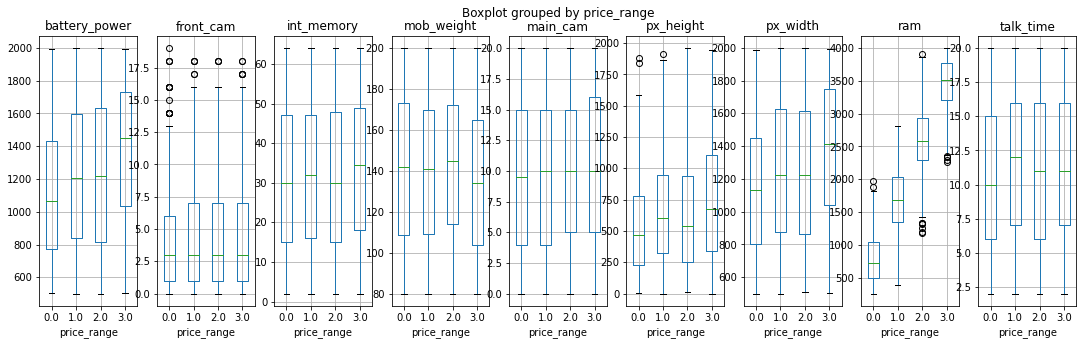

In [16]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['battery_power', 'front_cam','int_memory','mob_weight','main_cam','px_height','px_width','ram','talk_time']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    MobilePricesData.boxplot(column=PredictorCol, by='price_range', figsize=(20,15), vert=True, ax=PlotCanvas[i])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [17]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [18]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['battery_power', 'front_cam','int_memory','mob_weight','main_cam','px_height','px_width','ram','talk_time']
FunctionAnova(inpData=MobilePricesData, TargetVariable='price_range', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

battery_power is correlated with price_range | P-Value: 5.948688277085545e-20
front_cam is NOT correlated with price_range | P-Value: 0.5095041590900421
int_memory is correlated with price_range | P-Value: 0.03277693883277447
mob_weight is correlated with price_range | P-Value: 0.013117390712873744
main_cam is NOT correlated with price_range | P-Value: 0.4797489023362932
px_height is correlated with price_range | P-Value: 1.8860848027538453e-12
px_width is correlated with price_range | P-Value: 2.1169108878354858e-14
ram is correlated with price_range | P-Value: 0.0
talk_time is NOT correlated with price_range | P-Value: 0.18066864736912272


['battery_power', 'int_memory', 'mob_weight', 'px_height', 'px_width', 'ram']

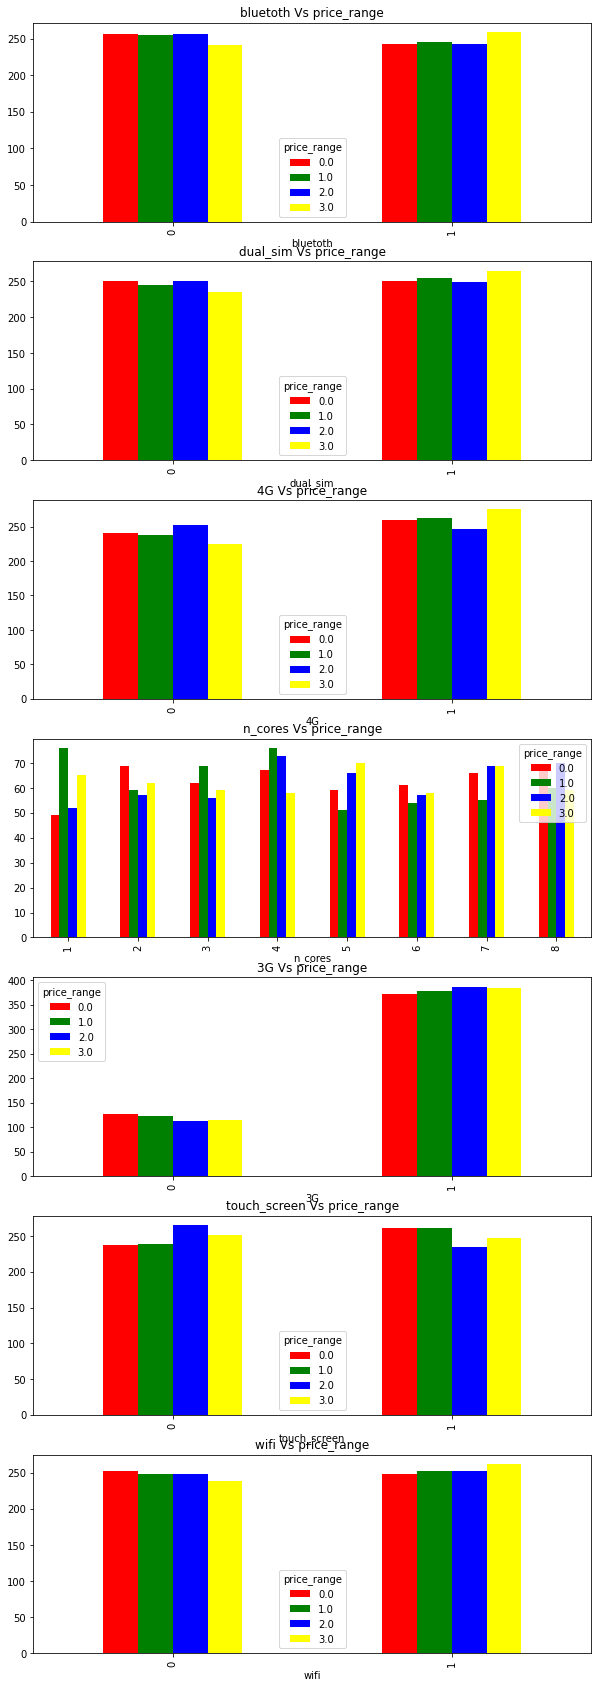

In [19]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['bluetoth', 'dual_sim', '4G','n_cores','3G','touch_screen','wifi']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=MobilePricesData[CategoricalCol], columns=MobilePricesData['price_range'])
    CrossTabResult.plot.bar(color=['red','green','blue','yellow'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'price_range')

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test



In [20]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [21]:
CategoricalVariables=['bluetoth', 'dual_sim', '4G','n_cores','3G','touch_screen','wifi']

# Calling the function
FunctionChisq(inpData=MobilePricesData, 
              TargetVariable='price_range',
              CategoricalVariablesList= CategoricalVariables)

bluetoth is NOT correlated with price_range | P-Value: 0.6980177809451273
dual_sim is NOT correlated with price_range | P-Value: 0.7323497176264594
4G is NOT correlated with price_range | P-Value: 0.36471408196943356
n_cores is NOT correlated with price_range | P-Value: 0.4882939110661021
3G is NOT correlated with price_range | P-Value: 0.7116958581372179
touch_screen is NOT correlated with price_range | P-Value: 0.27470114180281896
wifi is NOT correlated with price_range | P-Value: 0.8359905195342197


[]

# Selecting final predictors for Machine Learning

In [22]:
SelectedColumns=['battery_power', 'int_memory', 'mob_weight', 'px_height', 'px_width', 'ram','price_range']

# Selecting final columns
DataForML=MobilePricesData[SelectedColumns]
DataForML.head()

,battery_power,int_memory,mob_weight,px_height,px_width,ram,price_range
0,842,7,188,20,756,2549,1.0
1,1021,53,136,905,1988,2631,2.0
2,563,41,145,1263,1716,2603,2.0
3,615,10,131,1216,1786,2769,2.0
4,1821,44,141,1208,1212,1411,1.0


In [23]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [24]:
# Printing all the column names for our reference
DataForML.columns

Index(['battery_power', 'int_memory', 'mob_weight', 'px_height', 'px_width',
       'ram', 'price_range'],
      dtype='object')

In [25]:
# Separate Target Variable and Predictor Variables
TargetVariable='price_range'
Predictors=['battery_power', 'int_memory', 'mob_weight', 'px_height', 'px_width','ram']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 6)
(600, 6)
(1400,)
(600,)


# Standardization/Normalization of data

In [27]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1400, 6)
(1400,)
(600, 6)
(600,)


# Logistic Regression

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=3,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       151
         1.0       0.94      1.00      0.97       146
         2.0       0.99      0.95      0.97       148
         3.0       0.98      0.99      0.98       155

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

[[147   0   0   0]
 [  4 146   5   0]
 [  0   0 140   2]
 [  0   0   3 153]]
Accuracy of the model on Testing Sample Data: 0.98

Accuracy values for 10-fold Cross Validation:
 [0.97498887 0.979998   0.97499703 0.96989699 0.9949995  0.94504003
 0.98494899 0.97498984 0.96999253 0.96989849]

Final Average Accuracy of the model: 0.97


DecisionTreeClassifier(max_depth=10)
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       151
         1.0       0.76      0.82      0.79       146
         2.0       0.75      0.72      0.74       148
         3.0       0.87      0.87      0.87       155

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.83       600

[[134  17   0   0]
 [ 10 119  16   1]
 [  0  21 107  20]
 [  0   0  20 135]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.85709041 0.88008203 0.89508386 0.8479236  0.87954474 0.85158426
 0.83993597 0.85401993 0.88458807 0.83405922]

Final Average Accuracy of the model: 0.86


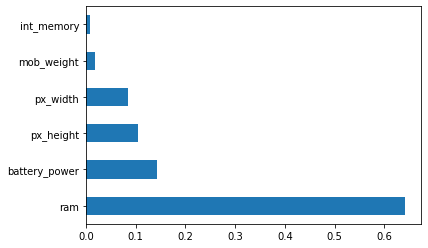

In [30]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=10,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest

RandomForestClassifier(max_depth=10, n_estimators=200)
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       151
         1.0       0.85      0.95      0.90       146
         2.0       0.89      0.82      0.86       148
         3.0       0.92      0.93      0.93       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

[[141  10   0   0]
 [  4 138   4   0]
 [  0  14 122  12]
 [  0   0  11 144]]
Accuracy of the model on Testing Sample Data: 0.91

Accuracy values for 10-fold Cross Validation:
 [0.91033316 0.92488887 0.91946126 0.92513666 0.9051394  0.9151281
 0.9048828  0.889846   0.89940623 0.9250307 ]

Final Average Accuracy of the model: 0.91


<AxesSubplot:>

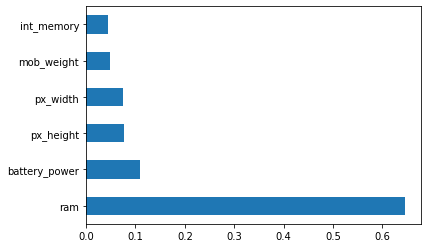

In [31]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=10, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Adaboost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.01, n_estimators=250)
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       151
         1.0       0.79      0.86      0.82       146
         2.0       0.83      0.78      0.80       148
         3.0       0.90      0.90      0.90       155

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

[[134  17   0   0]
 [ 12 126   8   0]
 [  0  17 115  16]
 [  0   0  16 139]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.86128336 0.88450496 0.88441552 0.89478379 0.88419072 0.86519352
 0.86430599 0.86908854 0.90400892 0.83588678]

Final Average Accuracy of the model: 0.87


<AxesSubplot:>

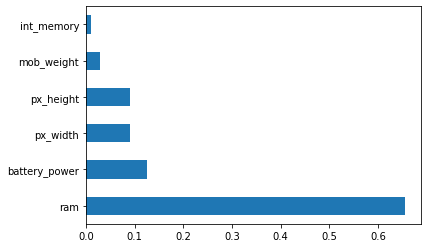

In [32]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=10,criterion='gini')
clf = AdaBoostClassifier(n_estimators=250, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Xgboost

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=200)

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[14:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

     

# K-Nearest Neighbor(KNN)

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=10, kernel='linear', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Naive Bays

In [ ]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Choosing only the most important variables

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='price_range'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['battery_power', 'int_memory', 'mob_weight', 'px_height', 'px_width','ram']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

# Retraining the model using 100% data

In [ ]:
# SVM
from sklearn import svm
#choose from different tunable hyper parameters
clf = svm.SVC(C=10, kernel='linear', gamma=0.01)
# Training the model on 100% Data available
FinalSVMModel=clf.fit(X,y)

#### Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalSVMModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalSVMModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalSVMModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

# Create a python function

In [ ]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML) 
    # Maintaining the same order of columns as it was during the model training
    Predictors=['battery_power', 'int_memory', 'mob_weight', 'px_height', 'px_width','ram']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalSVMModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [ ]:
# Calling the function for some new cases
NewSampleData=pd.DataFrame(
data=[[842,7,188,20,756,2550],
     [1954,24,187,512,1149,700]],
columns=['battery_power', 'int_memory', 'mob_weight', 'px_height', 'px_width','ram'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)